# **Barycenters를 이용한 시계열 표준 패턴 추출**

### 창원대 전자공학과 20145234 황주효 (Hwang Ju-hyo, Department of Electronic Engineering, Changwon University)
---

In [12]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from tslearn.clustering import TimeSeriesKMeans

with open("data.pickle","rb") as fr:s
    X = pickle.load(fr)

km = TimeSeriesKMeans(n_clusters = 5, metric = 'dtw', max_iter = 50, n_init = 10, n_jobs = -1).fit(X)
Y = km.fit_predict(X)

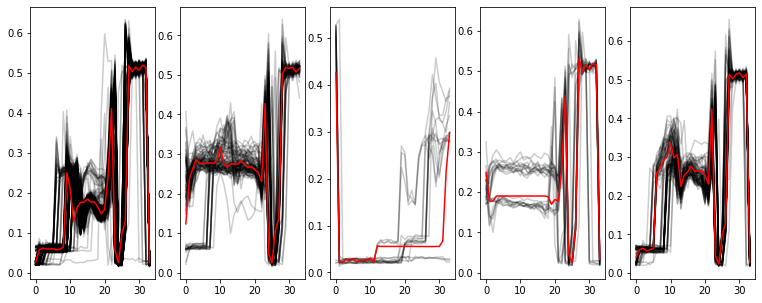

In [13]:
fig, ax = plt.subplots(1, 5, figsize=(13, 5))
for yi in range(5):
    for xx in X[Y == yi]:
        ax[yi].plot(xx.ravel(), "k-", alpha=.2)
    ax[yi].plot(km.cluster_centers_[yi].ravel(), "r-")

* 5개 중 1번, 5번 클러스터의 데이터를 사용
* 각 클러스터의 갯수를 세어본다

In [14]:
import numpy as np
np.unique(Y, return_counts = True)

(array([0, 1, 2, 3, 4], dtype=int64),
 array([393,  88,  15,  23,  81], dtype=int64))

In [15]:
X_con = []
for i in [0,2]:
    X_con.append(pd.DataFrame(X[Y==i].reshape(X[Y==i].shape[0], 34)))

X_con = pd.concat(X_con)
X_con

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.025474,0.023627,0.036403,0.034556,0.034556,0.033632,0.033632,0.033632,0.027283,0.032747,...,0.024551,0.033632,0.035441,0.032747,0.035441,0.029091,0.036403,0.029977,0.029091,0.029977
1,0.061877,0.063686,0.064571,0.064571,0.066379,0.068226,0.255666,0.250202,0.263901,0.260246,...,0.019086,0.019972,0.114634,0.516797,0.509524,0.512295,0.516797,0.510448,0.519567,0.026398
2,0.056374,0.058221,0.059145,0.060030,0.060030,0.060030,0.294840,0.246546,0.259322,0.263901,...,0.030939,0.027283,0.111902,0.504098,0.503175,0.525917,0.510448,0.525917,0.516797,0.028206
3,0.068226,0.069150,0.069150,0.069150,0.068226,0.068226,0.061877,0.245661,0.258437,0.262016,...,0.018163,0.019086,0.114634,0.559587,0.514988,0.503175,0.519567,0.520453,0.511333,0.019086
4,0.066379,0.068226,0.066379,0.067341,0.068226,0.067341,0.066379,0.247470,0.259322,0.270251,...,0.029091,0.075499,0.127371,0.531381,0.507754,0.494055,0.509524,0.517759,0.513180,0.023627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,0.508639,0.019086,0.019086,0.019086,0.020934,0.019972,0.019972,0.019972,0.023627,0.024551,...,0.029977,0.029977,0.029977,0.030939,0.030939,0.029977,0.029091,0.029091,0.029091,0.028206
11,0.026398,0.023627,0.022742,0.029977,0.026398,0.026398,0.019086,0.019086,0.019086,0.029091,...,0.233848,0.274791,0.280256,0.289337,0.281141,0.297533,0.273868,0.279370,0.282064,0.278408
12,0.519567,0.025474,0.025474,0.028206,0.029091,0.026398,0.029977,0.023627,0.023627,0.020934,...,0.071844,0.070959,0.277485,0.243853,0.270251,0.182899,0.253858,0.277485,0.292069,0.289337
13,0.501328,0.019972,0.028206,0.029091,0.026398,0.026398,0.029977,0.029977,0.029091,0.029091,...,0.064571,0.063686,0.065494,0.270251,0.252011,0.192904,0.236541,0.283873,0.288413,0.279370


In [16]:
X_re = np.array(X_con).reshape(X_con.shape[0], 34, 1)

from tslearn.barycenters import \
    euclidean_barycenter, \
    dtw_barycenter_averaging, \
    dtw_barycenter_averaging_subgradient, \
    softdtw_barycenter

def plot_helper(barycenter):
    # plot all points of the data set
    for series in X_re:
        plt.plot(series.ravel(), "k-", alpha=.2)
    # plot the given barycenter of them
    plt.plot(barycenter.ravel(), "r-", linewidth=2)

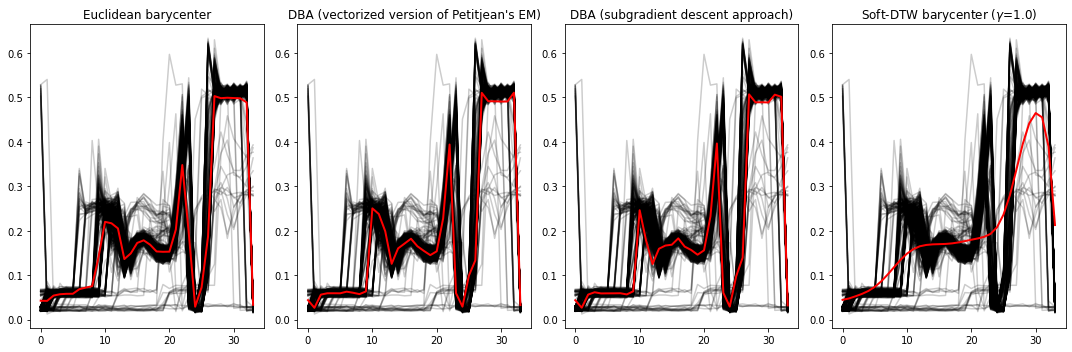

In [17]:
plt.figure(figsize = (15, 5))
ax1 = plt.subplot(1, 4, 1)
plt.title("Euclidean barycenter")
plot_helper(euclidean_barycenter(X_con))

plt.subplot(1, 4, 2, sharex=ax1)
plt.title("DBA (vectorized version of Petitjean's EM)")
plot_helper(dtw_barycenter_averaging(X_con, max_iter=50, tol=1e-3))

plt.subplot(1, 4, 3, sharex=ax1)
plt.title("DBA (subgradient descent approach)")
plot_helper(dtw_barycenter_averaging_subgradient(X_con, max_iter=50, tol=1e-3))

plt.subplot(1, 4, 4, sharex=ax1)
plt.title("Soft-DTW barycenter ($\gamma$=1.0)")
plot_helper(softdtw_barycenter(X_con, gamma=1, max_iter=50, tol=0.001))

# clip the axes for better readability

# show the plot(s)
plt.tight_layout()
plt.show()